# **Detecção de objetos com YOLOV3 usando o módulo de leitura de redes neurais cv2.dnn.readNetFrom()**

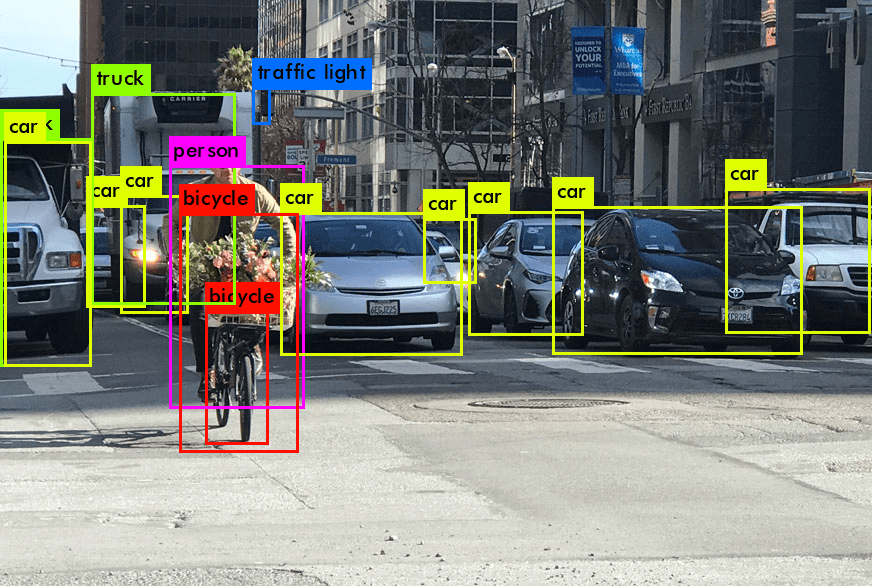


**Arquitetura YOLO**

![](https://opencv-tutorial.readthedocs.io/en/latest/_images/yolo1_net.png)

**Arquitetura YOLOV3**

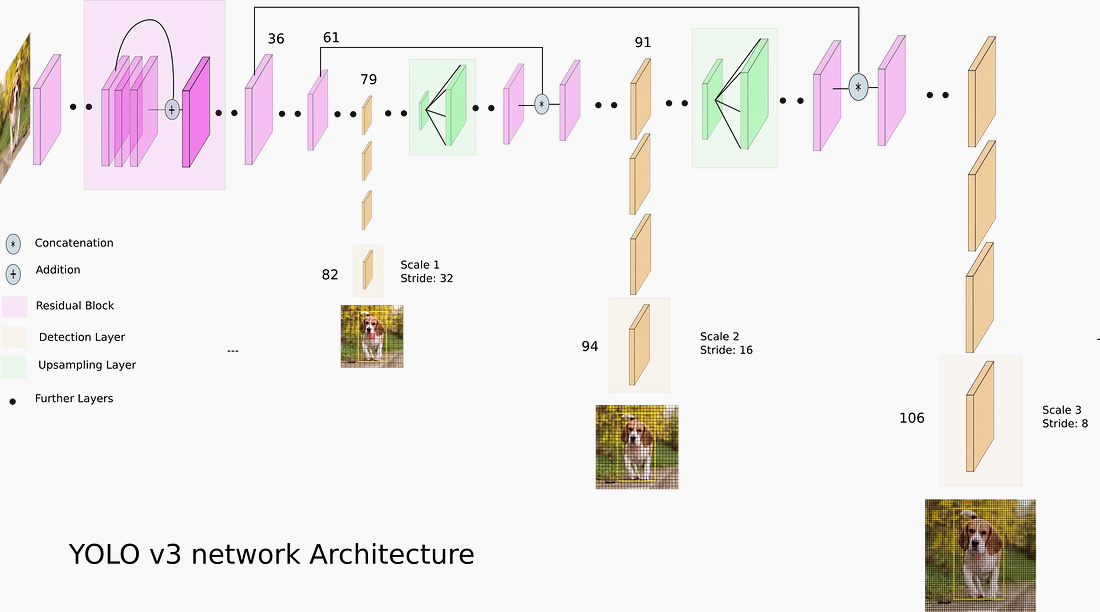

Para utilizar com o módulo do OpenCV os pesos da rede, precisamos baixar os pesos (ou treina-los).

1. Vamos usar os pesos Pretrained YOLOV3 (237MB)- https://pjreddie.com/media/files/yolov3.weights
2. Criar um objeto blob para carregar ao modelo
3. Definir o backend de execução do modelo (CPU ou GPU)

In [5]:
import numpy as np
import time
import cv2
import os
from os import listdir
from os.path import isfile, join
from matplotlib import pyplot as plt

In [6]:
def imshow(titulo = 'Imagem', imagem = None, size = 10):
    w, h = imagem.shape[0], imagem.shape[1]
    aspect = w/h
    plt.Figure(figsize=(size * aspect, size))
    plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))
    plt.title(titulo)
    plt.show()


In [7]:
classes = "./coco.names"
LABELS = open(classes).read().strip().split('\n')

CORES = np.random.randint(0, 255, size=(len(LABELS), 3), dtype="uint8")

print("Carregando pesos YOLOV3...")

peso = "./yolov3.weights"
cfg = "./yolov3.cfg"

""" 
O cv2.dnn.readNetFrom... no OpenCV é usado para carregar redes neurais treinadas a partir de diferentes frameworks.
Ele pertence ao módulo cv2.dnn, que lida com redes neurais profundas (Deep Neural Networks).

cv2.dnn.readNetFromCaffe(prototxt, model)
    Carrega um modelo treinado no Caffe.

cv2.dnn.readNetFromTensorflow(pb, pbtxt=None)
    Carrega um modelo do TensorFlow.

cv2.dnn.readNetFromONNX(onnx)
    Carrega um modelo no formato ONNX

cv2.dnn.readNetFromDarknet(cfg, weights)
    Carrega um modelo da arquitetura DarkNet

"""
def buildModel():

    net = cv2.dnn.readNetFromDarknet(cfg, peso)

    net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
    net.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU_FP16)
    return net

net = buildModel()
print("As camadas no YOLOv3")

ln = net.getLayerNames()

print(len(ln), ln)


Carregando pesos YOLOV3...
As camadas no YOLOv3
254 ('conv_0', 'bn_0', 'leaky_1', 'conv_1', 'bn_1', 'leaky_2', 'conv_2', 'bn_2', 'leaky_3', 'conv_3', 'bn_3', 'leaky_4', 'shortcut_4', 'conv_5', 'bn_5', 'leaky_6', 'conv_6', 'bn_6', 'leaky_7', 'conv_7', 'bn_7', 'leaky_8', 'shortcut_8', 'conv_9', 'bn_9', 'leaky_10', 'conv_10', 'bn_10', 'leaky_11', 'shortcut_11', 'conv_12', 'bn_12', 'leaky_13', 'conv_13', 'bn_13', 'leaky_14', 'conv_14', 'bn_14', 'leaky_15', 'shortcut_15', 'conv_16', 'bn_16', 'leaky_17', 'conv_17', 'bn_17', 'leaky_18', 'shortcut_18', 'conv_19', 'bn_19', 'leaky_20', 'conv_20', 'bn_20', 'leaky_21', 'shortcut_21', 'conv_22', 'bn_22', 'leaky_23', 'conv_23', 'bn_23', 'leaky_24', 'shortcut_24', 'conv_25', 'bn_25', 'leaky_26', 'conv_26', 'bn_26', 'leaky_27', 'shortcut_27', 'conv_28', 'bn_28', 'leaky_29', 'conv_29', 'bn_29', 'leaky_30', 'shortcut_30', 'conv_31', 'bn_31', 'leaky_32', 'conv_32', 'bn_32', 'leaky_33', 'shortcut_33', 'conv_34', 'bn_34', 'leaky_35', 'conv_35', 'bn_35', 'l

Toda entrada nesta rede é chamada de Blob Object

A função cv2.dnn.blobFromImage(img, scale, size, mean) transforma a imagem em um Blob:

```blob = cv.dnn.blobFromImage(img, 1/255.0, (416, 416), swapRB=True, crop=False)```

os parametros são:

1. imagem
2. fator de escala (1/255 para ter os pixels em valores de 0 a 1)
3. to tamanho
4. valor medio, default 0
5. troca os canais R e B (necessário para modelos treinados em RGB)
6. corta a imagem ao centro, se for necessário


**Nota**: Um blob é um objeto de matriz numpy 4D (imagens, canais, largura, altura). A imagem abaixo mostra o canal vermelho da bolha. Você percebe o brilho da jaqueta vermelha ao fundo.

Começando a detecção
[[32, 117, 148, 40], [34, 116, 175, 41], [26, 117, 161, 43], [32, 118, 177, 41]]
[0.9481653571128845, 0.9945829510688782, 0.9053682684898376, 0.990604817867279]
[np.int64(7), np.int64(7), np.int64(7), np.int64(7)]
[[32, 117, 148, 40], [34, 116, 175, 41], [26, 117, 161, 43], [32, 118, 177, 41]]
[0.9481653571128845, 0.9945829510688782, 0.9053682684898376, 0.990604817867279]
[np.int64(7), np.int64(7), np.int64(7), np.int64(7)]
[[32, 117, 148, 40], [34, 116, 175, 41], [26, 117, 161, 43], [32, 118, 177, 41]]
[0.9481653571128845, 0.9945829510688782, 0.9053682684898376, 0.990604817867279]
[np.int64(7), np.int64(7), np.int64(7), np.int64(7)]
truck: prob: 0.99


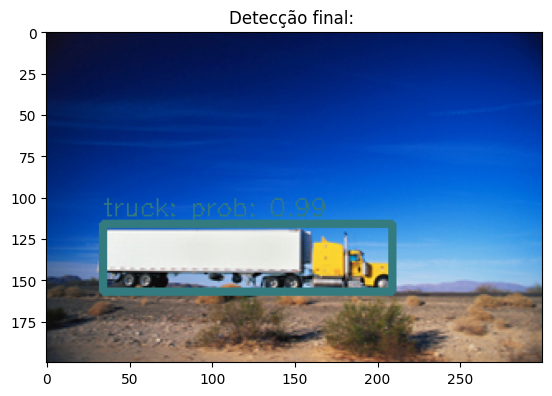

In [8]:
print("Começando a detecção")

pastaImagens = "./imagens/"

nomesDosArquivos = [file for file in listdir(pastaImagens) if isfile(join(pastaImagens, file))]

for arquivo in nomesDosArquivos:
    imagem = cv2.imread(pastaImagens+arquivo)

    (H, W) = imagem.shape[:2]


    #O OPENCV retorna indices iniciando em 1, por isso o indice deve ser reduzido a 1
    camadasNaoConnectadas = [ln[i - 1] for i in net.getUnconnectedOutLayers()]
    

    blob = cv2.dnn.blobFromImage(imagem, 1/255.0, (416,416), swapRB=True, crop=False)

    net.setInput(blob)

    camadasDeSaida = net.forward(camadasNaoConnectadas)

    #Desenhando a saida

    boxes = []
    confiacas = []
    ids = []

    """
    Portanto, as detecções contêm 85 parâmetros para cada objeto detectado, 
    onde os primeiros 5 parâmetros estão ligando a caixa e a confiança e, depois disso, 
    temos probabilidade de previsões de 80 classes
    """
    for saida in camadasDeSaida:
        #Varrendo as detecções
        for deteccao in saida:
        #pegar o ID da classe e a probabilidade da detecção
            #print(len(deteccao))
            probabilidades = deteccao[5:]
            #print(pontuacoes)
            classID = np.argmax(probabilidades)
            confianca = probabilidades[classID]

            if confianca > 0.75:
                #O YOLO retorna o centro (x,y) da caixa, seguido da largura e altura
                box = deteccao[0:4] * np.array([W, H, W, H])
                (centroX, centroY, largura, altura) = box.astype("int")

                #definindo o canto esquerdo
                x = int(centroX - (largura/2))
                y = int(centroY - (altura/2))

                boxes.append([x, y, int(largura), int(altura)])
                confiacas.append(float(confianca))
                ids.append(classID)

        print(boxes)
        print(confiacas)
        print(ids)
    #Iremos aplicar o Non-Maxima Supression para reduzir sobreposição de caixas. 

    idxs = cv2.dnn.NMSBoxes(boxes, confiacas, 0.5, 0.3)


    if len(idxs) > 0:

        for i in idxs.flatten():
            (x, y) = (boxes[i][0], boxes[i][1])
            (w, h) = (boxes[i][2], boxes[i][3])

            cor = [int(c) for c in CORES[ids[i]]]
            cv2.rectangle(imagem, (x, y), (x + w, y + h), cor, 3)
            texto = f"{LABELS[ids[i]]}: prob: {confiacas[i]:.2f}"
            print(texto)
            cv2.putText(imagem, texto, (x,y-5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, cor, 1)


        imshow("Detecção final: ", imagem, size=20)     



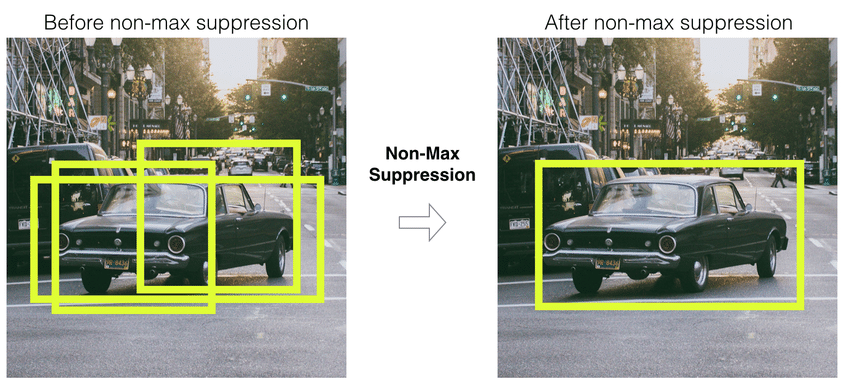